# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [2]:
import numpy as np
np.zeros((3, 4))


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
a = np.diag([1, 2, 3, 4, 5])
print(a)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [13]:
print(np.trace(a))

15


In [18]:
print(np.linalg.inv(a))

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [19]:
x = np.random.rand(4, 5)
print(x)

[[0.16848179 0.48863933 0.25351642 0.5689231  0.83776213]
 [0.31110506 0.51833837 0.25928433 0.81090958 0.76633605]
 [0.74976709 0.65263128 0.84578084 0.73440034 0.13315052]
 [0.53426694 0.14365076 0.82985906 0.65739831 0.66084576]]


In [21]:
print(np.linalg.det(x[1:3, 0:2]))

-0.1855961591506613


In [22]:
print(x.T @ x)

[[0.97276433 0.80965383 1.20088248 1.24998665 0.83245861]
 [0.80965383 0.95400619 0.92946802 1.27205215 0.98841409]
 [1.20088248 0.92946802 1.53551023 1.52117717 1.07211039]
 [1.24998665 1.27205215 1.52117717 1.95276423 1.63027614]
 [0.83245861 0.98841409 1.07211039 1.63027614 1.74356251]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [2]:
import scipy.linalg as sla
def my_det(X):

    M = X.copy()
    siz = len(M)
    for i in range(siz):
        for j in range(i + 1, siz):
            f = M[i][i]
            g = M[j][i]
            for k in range(siz):
                if f != 0:
                    M[j][k] -= M[i][k] * g / f
        wplus = 1
        wminus = -1
        for h in range(siz):
            wplus *= M[h][h]
            wminus *= M[siz - h - 1][h]
        det = wplus + wminus
    return det

Простая проверка:

In [4]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))
X = np.zeros((3, 3))
print(my_det(X))

-1
0.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [8]:
# Запустите этот блок кода
for _ in range(100):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

FAILED
FAILED
FAILED
FAILED
FAILED
FAILED
FAILED


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

8.88 µs ± 94.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
543 µs ± 7.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
76.6 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
466 ms ± 6.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.32 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<ipython-input-6-846bd7f8a458>:16: RuntimeWarning: overflow encountered in double_scalars
  wplus *= M[h][h]


7min 44s ± 3.45 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


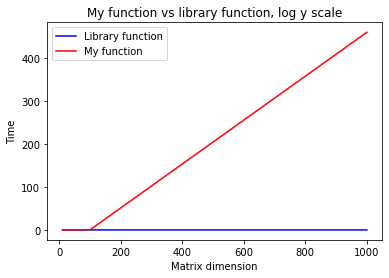

In [13]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

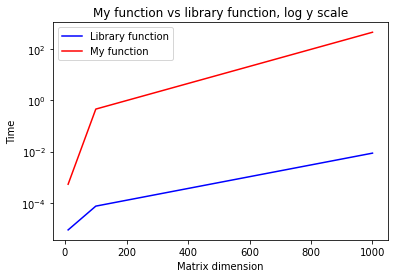

In [14]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [4]:
import numpy as np
a = np.array([[1, 0], [10**20, 1]])
b = np.array([[10**(-20), 1], [0, 1-10**20]])
print(a@b)

[[1e-20 1]
 [1.0 1]]


In [3]:
a = np.array([[1., 0.], [10.**20, 1.]])
b = np.array([[10.**(-20), 1.], [0., 1.-10.**20]])
print(a@b)

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
    Первый случай правильный

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [24]:
def my_pascal(dim):
    
    P = np.zeros((dim, dim))
    
    P[0,:] = 1
    P[:,0] = 1

    for i in range(1,dim):
        for j in range(1,dim):
            P[i][j] = P[i-1][j] + P[i][j-1]
    
    return P
print(my_pascal(5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


Чему равен её определитель? Строго поясните свой ответ.

----
**Ответ: 1 при любых n.  Давайте преобразуем Матрицу Паскаля в нижнетреугольную. Для начала заметим, что определитель не изменится, если к любому его столбцу (строке) прибавить произвольную линейную комбинацию его столбцов (строк).Поэтому отнимем из каждой строки предыдущую кроме первой. Следовательно, заметим что в первом столбце у нас стоят нули, кроме первой строки. Далее, повторим то же самое кроме 1 и 2 строки. Мы получаем, что у нас элемент на 2ой строке 2ого столбца равен 1, а остальные ниже в этом столбце равны нулю. Далее повторяем то же самое кроме строк 1, 2, 3 и тд (Иначе говоря при каждом таком элементарном преобразовании строки(кроме первой) будут сдвигаться вправо, так как каждый элемент матрицы паскаля равен сумме элементов слева от него и сверху от него. А вычитанием элемента сверху мы получаем элемент, который находился левее). В конце данных преобразований, на главной диагонали будут находится единицы, которые до этого составляли первый столбец матрицы Паскаля. А определитель верхнетреугольной матрицы равен произведению чисел, стоящих на главной диагонали, то есть 1x1x1x... = 1**


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [25]:
print(np.linalg.det(my_pascal(30)))

7.2238134815468896e+47


Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

$x_{1}$ = 4
$x_{2}$ = 2  
Det(K) = 1x100001 - 100x1000 = 1

In [26]:
K = np.array([[1, 1000], [100, 100001]])
np.linalg.det(K)


0.9999999999990905

Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [30]:
from scipy.linalg import solve
b = np.array([2004.01, 200402])

x = np.linalg.solve(K, b)
print(x)

[1.00401e+03 1.00000e+00]


Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [2]:
def my_cond(A):
    if A.shape[0] != A.shape[1]:
        raise ValueError
    Ao = np.linalg.inv(A)
    s1 = np.trace(A.T @ A)
    s2 = np.trace(Ao.T @ Ao)
    cond = (s1*s2)**(0.5)
    return cond

Посчитайте число обусловленности матрицы из задания 3.3.

In [45]:
print(my_cond(K))

3756921844.554971


Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

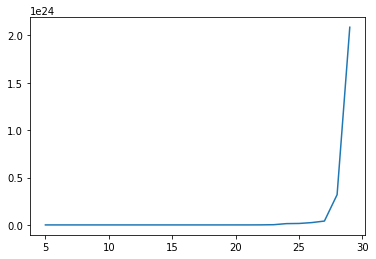

In [9]:
import matplotlib.pyplot as plt
x = np.arange(5, 30, 1)
y = []
for i in x:
    y.append(my_cond(my_pascal(i)))
y1 = np.array(y)
plt.plot(x, y1)
plt.show()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [6]:
def prod_and_sq_sum(A):
  m = np.diag(A)
  return np.sum(np.square(m)), np.prod(m)

passed


In [47]:
a = np.array([[11,2,4],[4,5,6],[10,8,-12]])
print(prod_and_sq_sum(a))

(290, -660)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [7]:
def f(A, B, lmbd, k):
    if k < A.shape[1]:
        A = A[:, 0:k]
        B = B[:, 0:k]
        lmbd = lmbd[0:k]
    D = np.einsum('ij,i->ij', B.T, lmbd)
    return A @ D

passed


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [8]:
def get_diag(A,B):
    return np.sum(A * B.T, axis=1)

passed


In [52]:
a = np.array([[11,2,4],[4,5,6],[10,8,-12]])
b = np.array([[11,2,4],[4,5,6],[10,8,-12]])
print(get_diag(a,b))

[169  81 232]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [9]:
import math

def shrink_rotate(x, a, coef=1., angle=0.):
    return coef * (x - a) * (math.cos(angle) + 1j * math.sin(angle)) + a
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    y = shrink_rotate(x, a, coef, angle)
    return complex(y.real, -y.imag)
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    f = (x - a) * r**2
    g = abs(x - a) ** 2
    return f / g + a
    raise NotImplementedError()

shrink_rotate passed
shrink_rotate_conj passed
geometric_inverse passed


**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

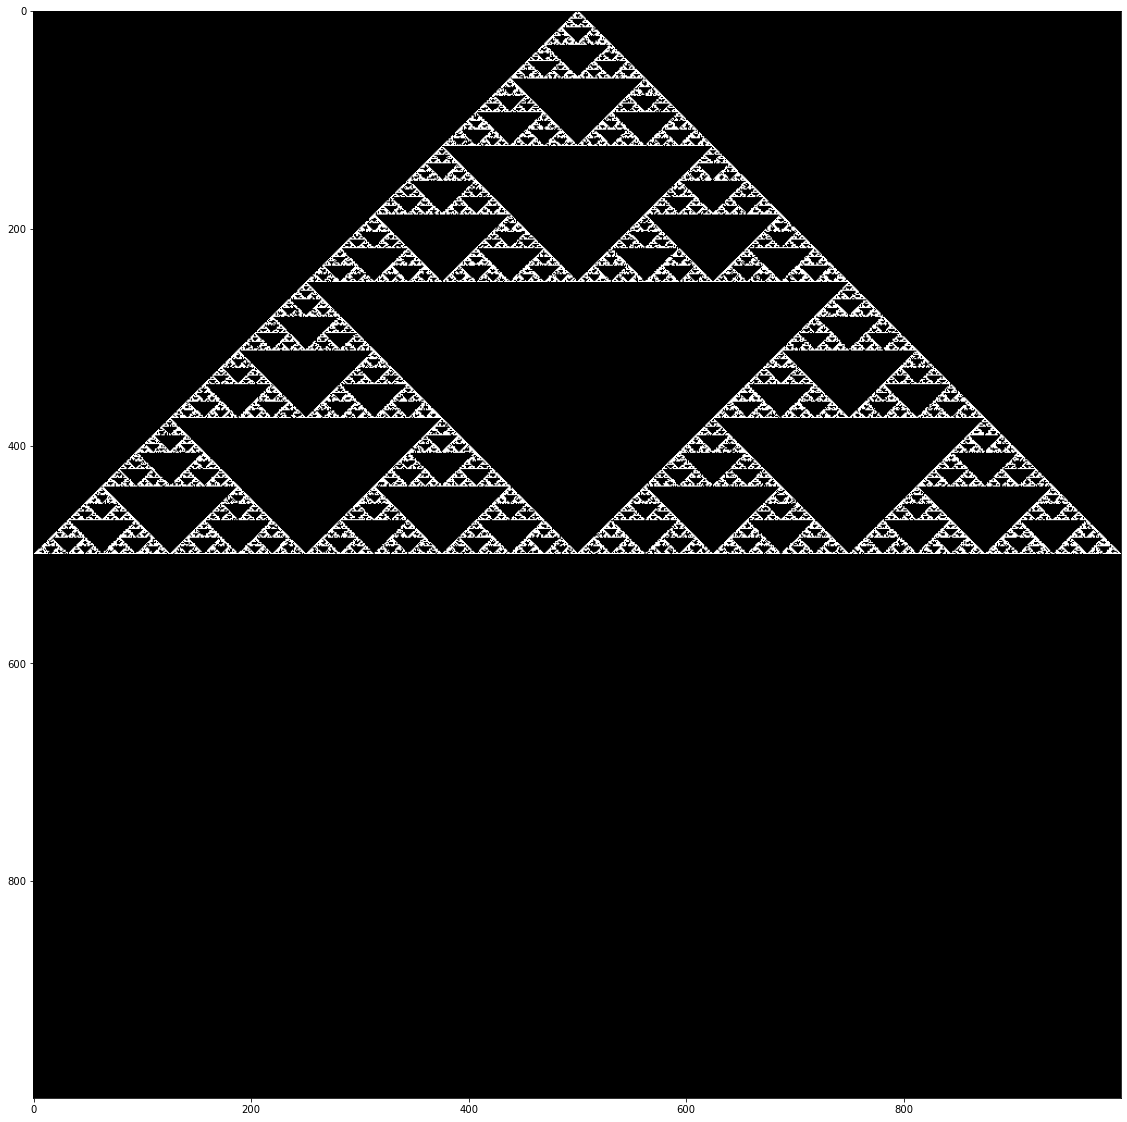

In [35]:
import math
res = np.array([[0] * 1000] * 1000)
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
 
for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int(500 * np.imag(z))+1
    y = int(500 * np.real(z))
    res[500 - x][500 + y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(res, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

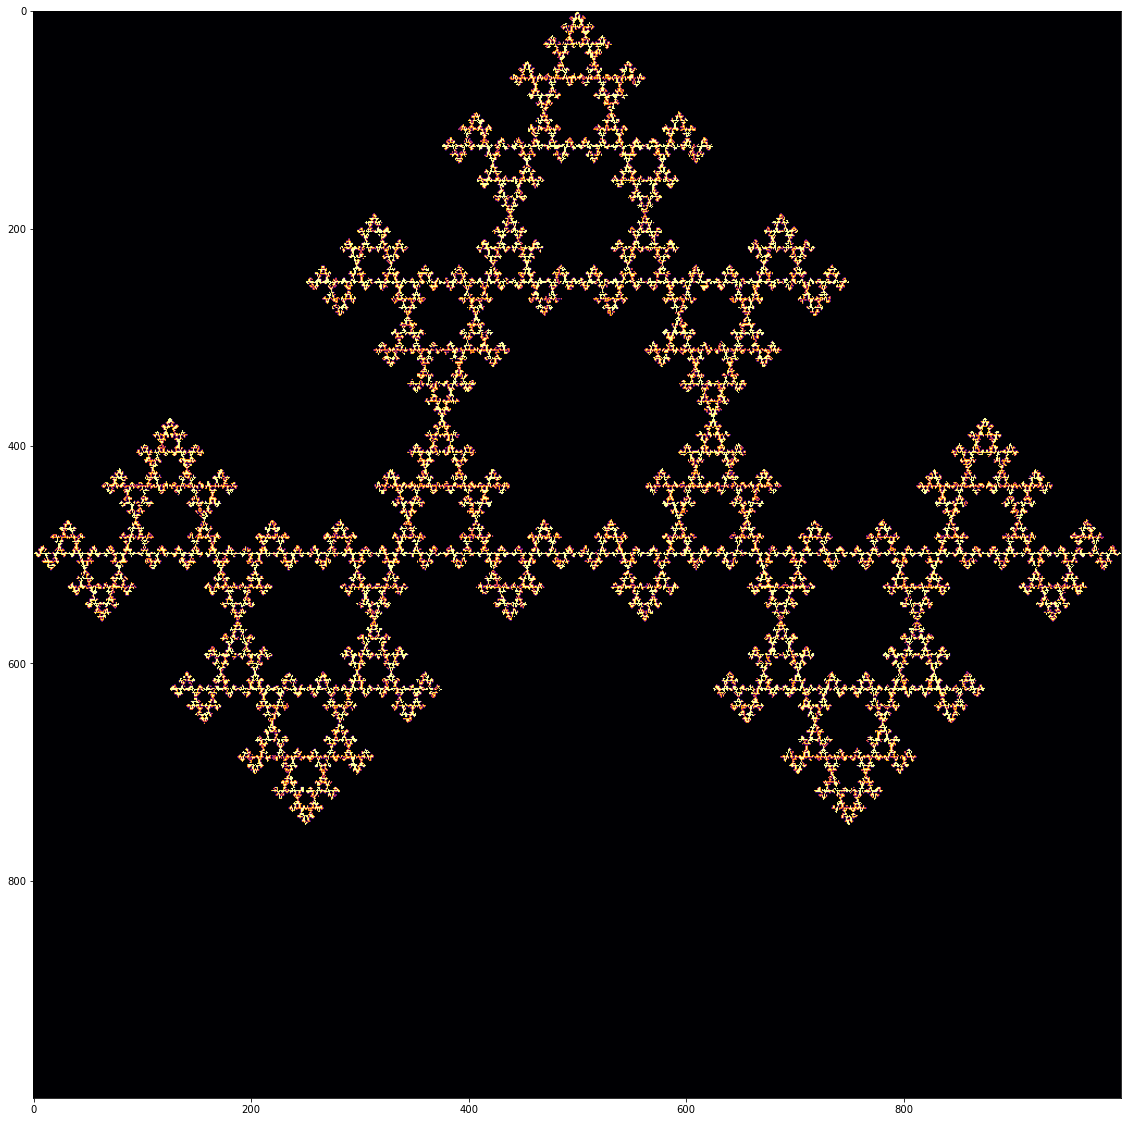

In [42]:
import math

res = np.array([[0] * 1000] * 1000)
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
 
for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    res[500 - int(500 * np.imag(z))-1][500 + int(500 * np.real(z))] = 1
plt.figure(figsize=(20, 20))
plt.imshow(res, cmap='inferno')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

26.8 µs ± 534 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.1 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
89.2 µs ± 8.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
107 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
172 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
316 µs ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
621 µs ± 80.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
945 µs ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.29 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.97 ms ± 697 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.8 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.6 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


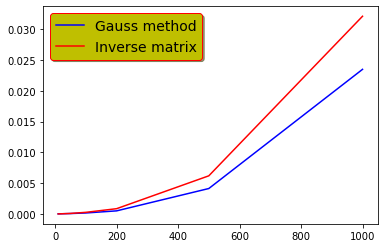

In [37]:
gauss = []
inverse = []
l = [10, 50, 100, 200, 500, 1000]
for i in l:
    A = np.random.rand(i, i)
    B = np.random.rand(i, 10)
    rg = %timeit -o sla.solve(A, B)
    gauss.append(rg.best)
    ri = %timeit -o sla.inv(A) @ B
    inverse.append(ri.best) 
    
plt.plot(l, gauss, color='blue', label='Gauss method')
plt.plot(l, inverse, color='red', label='Inverse matrix')
plt.legend(fontsize=14, shadow=True, framealpha=1, facecolor='y', edgecolor='r')

197 µs ± 9.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
320 µs ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
251 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
319 µs ± 5.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
426 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
394 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
650 µs ± 9.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
474 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.7 ms ± 66.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.23 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.56 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.25 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.02 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.14 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops 

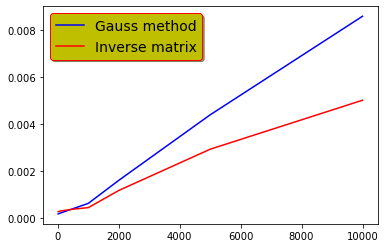

In [38]:
gauss = []
inverse = []
l = [10, 100, 500, 1000, 2000, 5000, 10000]
for i in l:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, i)
    rg = %timeit -o sla.solve(A, B)
    gauss.append(rg.best)
    ri = %timeit -o sla.inv(A) @ B
    inverse.append(ri.best)    

plt.plot(l, gauss, color='blue', label='Gauss method')
plt.plot(l, inverse, color='red', label='Inverse matrix')

plt.legend(fontsize=14, shadow=True, framealpha=1, facecolor='y', edgecolor='r')

При росте числа неизвестных по времени выигрывает метод Гаусса, а при правых частей (при неизменном количестве неизвестных) начинает выигрывать метод умножения на обратную матрицу.
При методе Гаусса программа делает примерно $n^3 + nm$ операций, а при методе умножения на обратную программа делает примерно $n^3 + n^2$ операция, поэтому при увеличении n выигрывает метод Гаусса, а при увеличении m метод умножения на обратную матрицу